# Ultimate Texas Hold'em Simulation
## m Days with n Games per Day

In [73]:
from ultimatepoker import Game
import sys
import pandas
from random import seed
from random import gauss

import matplotlib.pyplot as plt

In [74]:
n_games_per_day = 400
m_days = 1000

In [75]:
bet_mean = 400
bet_std = 0

In [76]:
daily_result = pandas.DataFrame(columns=[
    'GameNr',
    'PlayerCards',
    'DealerCards',
    'CommunityCards',
    'PlayerHand',
    'DealerHand',
    'AnteBet',
    'BlindBet',
    'PlayBet',
    'TripsBet',
    'PlayerGain',
    'PlayerTotalGain',
    'PlayerTotalBet'
], index=range(1, (n_games_per_day + 1)))

In [77]:
total_per_day = pandas.DataFrame(columns=[
    'PlayerTotalGain',
    'PlayerTotalBet',
    'PlayerMaxGain'
], index=range(1, (m_days + 1)))

In [78]:
seed(42)
for cur_day in range(m_days):
    dailyGain = 0
    dailyBet = 0
    
    for cur_game in range(n_games_per_day):
        bet_size = gauss(bet_mean, bet_std)
        
        game = Game(bet_size, False)
        gain, bet = game.playGame()
        
        daily_result['GameNr'][cur_game + 1] = cur_game
        
        daily_result['PlayerCards'][cur_game + 1] = str(game._player[0]) + ', ' + str(game._player[1])
        daily_result['DealerCards'][cur_game + 1] = str(game._dealer[0]) + ', ' + str(game._dealer[1])
        daily_result['CommunityCards'][cur_game + 1] = str(game._community[0]) + ', ' + \
                                                str(game._community[1]) + ', ' + \
                                                str(game._community[2]) + ', ' + \
                                                str(game._community[3]) + ', ' + \
                                                str(game._community[4])
        
        daily_result['PlayerHand'][cur_game + 1] = str(game._playerHand)
        daily_result['DealerHand'][cur_game + 1] = str(game._dealerHand)
        
        daily_result['AnteBet'][cur_game + 1] = game._bet.ante
        daily_result['BlindBet'][cur_game + 1] = game._bet.blind
        daily_result['PlayBet'][cur_game + 1] = game._bet.play
        daily_result['TripsBet'][cur_game + 1] = game._bet.trips
        
        dailyGain += gain
        dailyBet += bet
        
        daily_result['PlayerGain'][cur_game + 1] = gain
        
        daily_result['PlayerTotalGain'][cur_game + 1] = dailyGain
        daily_result['PlayerTotalBet'][cur_game + 1] = dailyBet
    
    total_per_day['PlayerTotalGain'][cur_day + 1] = dailyGain
    total_per_day['PlayerTotalBet'][cur_day + 1] = dailyBet
    total_per_day['PlayerMaxGain'][cur_day + 1] = max(daily_result['PlayerTotalGain'])

In [79]:
daily_result

,GameNr,PlayerCards,DealerCards,CommunityCards,PlayerHand,DealerHand,AnteBet,BlindBet,PlayBet,TripsBet,PlayerGain,PlayerTotalGain,PlayerTotalBet
1,0,"4 of Diamond, 7 of Hearts","K of Clubs, 3 of Clubs","2 of Diamond, A of Hearts, 8 of Diamond, 8 of ...","[8 of Diamond, 8 of Hearts, 5 of Spade, 7 of H...","[8 of Diamond, 8 of Hearts, 5 of Spade, K of C...",400.0,400.0,0.0,400.0,-1200.0,-1200.0,1200.0
2,1,"Q of Hearts, 6 of Spade","7 of Diamond, 6 of Clubs","5 of Diamond, J of Hearts, 10 of Spade, 8 of H...","[5 of Diamond, 5 of Hearts, 10 of Spade, J of ...","[5 of Diamond, 5 of Hearts, 8 of Hearts, 10 of...",400.0,400.0,0.0,400.0,-1200.0,-2400.0,2400.0
3,2,"8 of Clubs, 9 of Spade","10 of Hearts, 8 of Hearts","Q of Diamond, 8 of Spade, A of Diamond, K of S...","[8 of Clubs, 8 of Spade, A of Diamond, A of Cl...","[8 of Hearts, 8 of Spade, A of Diamond, A of C...",400.0,400.0,800.0,400.0,0,-2400.0,4400.0
4,3,"3 of Hearts, 3 of Clubs","10 of Hearts, 2 of Spade","8 of Clubs, 6 of Spade, 4 of Diamond, 3 of Spa...","[3 of Hearts, 3 of Clubs, 3 of Spade, 8 of Clu...","[4 of Diamond, 4 of Clubs, 6 of Spade, 8 of Cl...",400.0,400.0,400.0,400.0,5200.0,2800.0,6000.0
5,4,"7 of Hearts, 10 of Spade","8 of Spade, 3 of Clubs","A of Hearts, 5 of Diamond, 4 of Hearts, 5 of H...","[5 of Diamond, 5 of Hearts, 7 of Hearts, 10 of...","[5 of Diamond, 5 of Hearts, 6 of Clubs, 8 of S...",400.0,400.0,0.0,400.0,-1200.0,1600.0,7200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,395,"7 of Diamond, 2 of Clubs","K of Diamond, 10 of Diamond","9 of Diamond, J of Clubs, J of Spade, 4 of Spa...","[J of Clubs, J of Spade, 7 of Diamond, 9 of Di...","[10 of Diamond, 10 of Hearts, J of Clubs, J of...",400.0,400.0,0.0,400.0,-1200.0,0.0,746400.0
397,396,"5 of Hearts, 6 of Hearts","Q of Clubs, Q of Hearts","5 of Spade, 2 of Clubs, A of Spade, 4 of Heart...","[5 of Hearts, 5 of Spade, A of Spade, A of Clu...","[Q of Clubs, Q of Hearts, A of Spade, A of Clu...",400.0,400.0,800.0,400.0,-2000.0,-2000.0,748400.0
398,397,"3 of Spade, 9 of Diamond","4 of Hearts, 5 of Clubs","7 of Diamond, Q of Hearts, Q of Diamond, A of ...","[Q of Hearts, Q of Diamond, 7 of Diamond, 9 of...","[Q of Hearts, Q of Diamond, 6 of Hearts, 7 of ...",400.0,400.0,0.0,400.0,-1200.0,-3200.0,749600.0
399,398,"10 of Spade, Q of Diamond","6 of Clubs, K of Diamond","5 of Hearts, K of Hearts, 9 of Diamond, 8 of S...","[8 of Spade, 9 of Diamond, 10 of Spade, Q of D...","[K of Diamond, K of Hearts, 6 of Clubs, 8 of S...",400.0,400.0,1600.0,400.0,-2800.0,-6000.0,752400.0


In [80]:
total_per_day

,PlayerTotalGain,PlayerTotalBet,PlayerMaxGain
1,-58400.0,755200.0,800.0
2,2600.0,783200.0,10200.0
3,-2000.0,766000.0,45600.0
4,6200.0,797200.0,39600.0
5,-78800.0,770000.0,6200.0
...,...,...,...
996,-61600.0,773200.0,10400.0
997,19400.0,789200.0,27400.0
998,-14200.0,778400.0,21600.0
999,-30200.0,754400.0,27000.0


Text(0, 0.5, 'Frequency')

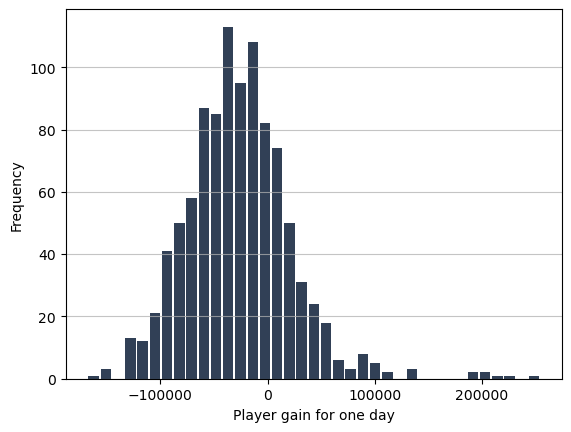

In [81]:
n, bins, patches = plt.hist(x=total_per_day['PlayerTotalGain'],
                           bins='auto',
                           color='#1A2B44', # Night Blue: #1A2B44 St. Moritz Gold: #B79164
                           alpha=0.9,
                           rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Player gain for one day')
plt.ylabel('Frequency')

In [82]:
max(total_per_day['PlayerTotalGain'])

254400.0

In [83]:
daily_result.iloc[247]

GameNr                                                           247
PlayerCards                                 4 of Diamond, 4 of Spade
DealerCards                                  Q of Spade, A of Hearts
CommunityCards     9 of Diamond, 10 of Hearts, 2 of Diamond, Q of...
PlayerHand         [4 of Diamond, 4 of Spade, 10 of Hearts, J of ...
DealerHand         [Q of Spade, Q of Diamond, 10 of Hearts, J of ...
AnteBet                                                        400.0
BlindBet                                                       400.0
PlayBet                                                          0.0
TripsBet                                                       400.0
PlayerGain                                                   -1200.0
PlayerTotalGain                                             -20200.0
PlayerTotalBet                                              468400.0
Name: 248, dtype: object

In [84]:
daily_result['PlayerCards'][248]

'4 of Diamond, 4 of Spade'

In [85]:
daily_result['DealerCards'][248]

'Q of Spade, A of Hearts'

In [86]:
daily_result['CommunityCards'][248]

'9 of Diamond, 10 of Hearts, 2 of Diamond, Q of Diamond, J of Clubs'

In [87]:
daily_result['PlayerHand'][248]

'[4 of Diamond, 4 of Spade, 10 of Hearts, J of Clubs, Q of Diamond] (Type: PAIR)'

In [88]:
daily_result['DealerHand'][248]

'[Q of Spade, Q of Diamond, 10 of Hearts, J of Clubs, A of Hearts] (Type: PAIR)'